### Choosing the Right Metric


<center>
    <img src = 'images/uci_biz.png'/>
</center>


This module introduced both the K Nearest Neighbors model as well as a variety of different metrics for classification.  It is important to select and understand the appropriate metric for your task.  This exercise is meant to get practice considering the difference between these new classification metrics and accompanying evaluation tools. Specifically, explore datasets related to business from the UCI Machine Learning Repository [here](https://archive-beta.ics.uci.edu/ml/datasets?f%5Barea%5D%5B0%5D=business&p%5Boffset%5D=0&p%5Blimit%5D=10&p%5BorderBy%5D=NumHits&p%5Border%5D=desc&p%5BStatus%5D=APPROVED).  

Select a dataset of interest and clearly state the classification task.  Specifically, describe a business problem that could be solved using the dataset and a KNN classification model.  Further, identify what you believe to be the appropriate metric and justify your choice.  Build a basic model with the `KNearestNeighbor` and grid search to optimize towards your chosen metric.  Share your results with your peers.

### Dataset Selection
We are selecting a data set for heart failure from: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records
The idea is to predict which patients may experience a death event given their heart test values and other health metrics. This is a binary classification problem where the target variable is DEATH_EVENT. We will use the K-Nearest Neighbors algorithm to build a model that can predict the likelihood of a death event for a patient. The appropriate metric for this problem is accuracy, as we want to know how many patients were correctly classified as having a death event or not. However, recall is also important as we do want to avoid false negatives as much as possible.

In [3]:
# Importing the necessary libraries for pandas and numpy and sci-kit learn
import pandas as pd
import numpy as np
import sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Load the data
data = pd.read_csv('heart_failure.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Separate features and target
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid
param_grid = {
    'knn__n_neighbors': range(1, 31)  # We'll test k values from 1 to 30
}


In [8]:
# Set up GridSearchCV
grid_search = GridSearchCV(knn_pipe, param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_k = grid_search.best_params_['knn__n_neighbors']
best_score = grid_search.best_score_

print(f"Best k: {best_k}")
print(f"Best cross-validation score: {best_score:.4f}")

# The best model is already fitted, we can use it directly
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best k: 7
Best cross-validation score: 0.7698
Test set accuracy: 0.6833

Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        35
           1       1.00      0.24      0.39        25

    accuracy                           0.68        60
   macro avg       0.82      0.62      0.59        60
weighted avg       0.79      0.68      0.62        60



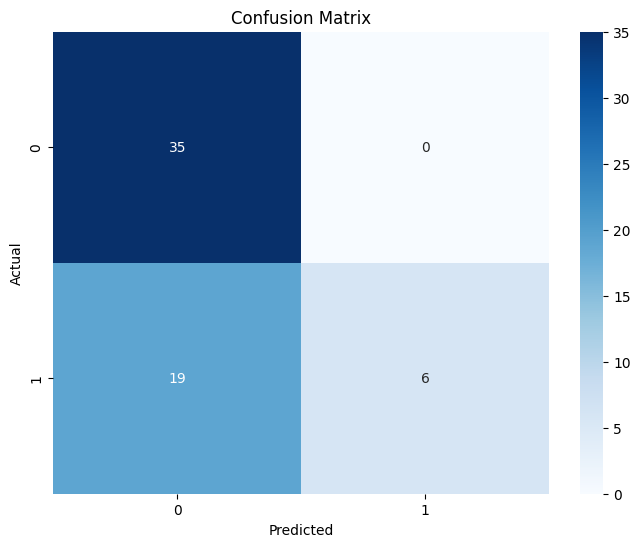

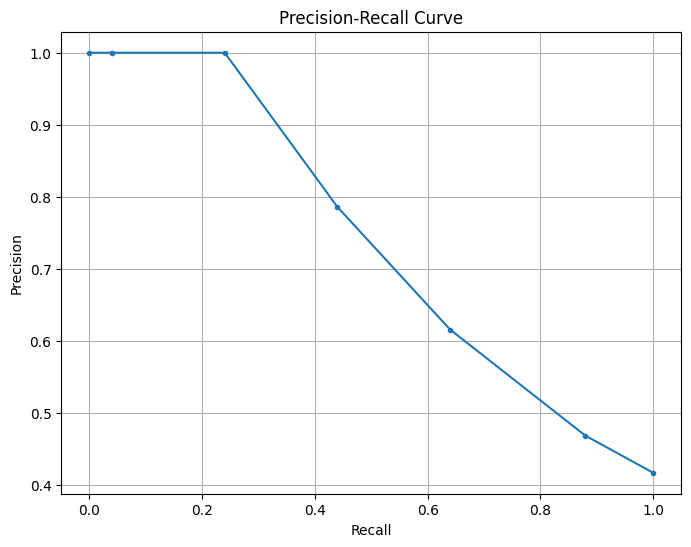

In [11]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Generate precision-recall curve
y_scores = best_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

In [12]:
from sklearn.metrics import precision_score, recall_score


# Get probability predictions
y_scores = best_model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
thresholds = np.arange(0.3, 0.9, 0.1)
results = []

for threshold in thresholds:
    y_pred = (y_scores >= threshold).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results.append({
        'Threshold': threshold,
        'Precision': precision,
        'Recall': recall
    })

# Create DataFrame
df_results = pd.DataFrame(results)

# Display the results
print("\nPrecision and Recall for different thresholds:")
print(df_results.to_string(index=False))




Precision and Recall for different thresholds:
 Threshold  Precision  Recall
       0.3   0.785714    0.44
       0.4   0.785714    0.44
       0.5   1.000000    0.24
       0.6   1.000000    0.04
       0.7   1.000000    0.04
       0.8   0.000000    0.00
       0.9   0.000000    0.00


/Users/georgeli/Downloads/Try_it_12.1_starter/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/georgeli/Downloads/Try_it_12.1_starter/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
